# <center> <font color="red"> Administración Activa vs Administración Pasiva del Capital </font>



<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center><font color= #F3465> <font size = 6>Microestructura y Sistemas de Trading.</font> </font> <br><br>
<Strong> <font size = 3> Laboratoria No. : </font> </Strong> 1<br><br>
<Strong> <font size = 3> Profesor: </font> </Strong>Francisco Muñoz<br><br>
<Strong> <font size = 3> Fecha de entrega:  </font> </Strong> 15 de Septiembre de 2019<br><br>
<Strong> <font size = 3> Integrantes: </font> </Strong> 
<center> Axel Munguía

<center> Esteban Navarrete

<center> Alejandro Preciado

<center> José Antonio Quintero

### ¿Qué es un ETF
Un Exchange Traded Fund, ETF, por sus siglas en inglés es un conjunto diversificado de activos, como un fondo de inversión, que cotiza en bolsa (como si fuera una acción). Los ETFs le permiten invertir su dinero fácilmente, con bajo costo y de manera eficiente a nivel impositivo.

Consultado en: https://www.blackrock.com/mx/intermediarios/recursos/educacion/centro-de-aprendizaje-sobre-etf/que-es-un-etf
    
### ¿Qué es el índice S&P 500?

El índice Standard & Poor's 500 (Standard & Poor's 500 Index) también conocido como S&P 500 es uno de los índices bursátiles más importantes de Estados Unidos. Al S&P 500 se lo considera el índice más representativo de la situación real del mercado.
El índice se basa en la capitalización bursátil de 500 grandes empresas que poseen acciones que cotizan en las bolsas NYSE o NASDAQ, el índice captura aproximadamente el 80% de toda la capitalización de mercado en Estados Unidos.

Consultado en: https://es.wikipedia.org/wiki/S&P_500

### ¿Qué o quién es BlackRock?
BlackRock es una empresa de gestión de inversiones estadounidense cuya sede central se encuentra en Nueva York. La empresa es considerada como la mayor empresa de gestión de activos del mundo, con unos activos bajo gestión valorados en más de 5,1 billones de dólares en 2016 según la compañía.
Consultado en:https://www.blackrock.com/mx

### Introducción

El siguiente trabajo tiene la finalidad de realizar un análisis profundo y exhaustivo sobre el  ETF: iShares Core S&P 500 ETF.

El siguiente documento se organiza de la siguiente manera:

- Análisis y exploración del ETF (acciones que lo conforman, tipos de activos, frecuencia en la capitalización promedio de los activos, tipos de sectores, ponderación promedio por sector, etc..).
- Calculo del NAV diario. 
- Medidas estadísticas descriptivas sobre el comportamiento del ETF (media, volatilidad).
- Propuestas de Rebalanceo.
- Modelos Predictivos a partir del peso de cada activo en el portafolio.


**Situación**

Acabas de entrar a trabajar a una operadora de fondos de inversión como analista financiero dentro de la mesa de análisis del mercado de renta variable. En la junta trimestral se plantea la posibilidad de crear un fondo propio con exposición al mercado de valores de USA tratando de replicar a los ETFs conocidos como ishares que la empresa BlackRock ofrece.

La idea es replicar un ETF con posiciones en directo. Te han asignado la tarea de hacer un ejercicio simple de replicar la construcción de un portafolio de inversión y un criterio de rebalanceo lo más parecido a un ETF de ishares que tu selecciones. Esto con la finalidad de comparar los resultados de haber rebalanceado periódicamente el portafolio, ó, no haberlo hecho y continuar todo un año con las mismas posiciones.

**Para poder correr el siguiente código se necesitan de las librerías listadas a bajo, de ser necesario se deja en la siguiente celda una oportunidad para instalar todas las paqueterías.**

- Pandas 
- NumPy
- Matplotlib
- Pandas-datareader
- IPython
- Warnings
- Plotly
- Scipy
- Sklearn

### ETF a utilizar: iShares Core S&P 500 ETF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web 
from IPython.display import IFrame
import IPython
import warnings
warnings.filterwarnings("ignore")
style.use("ggplot")

# Análisis de S&P 500 ETF (Febrero 2018)

In [2]:
# Cabecera del ETF
data = pd.read_csv("../Datos/Febrero_2018.csv",skiprows=10)
data_ = data.iloc[:-2,:]
data_.head()

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
0,AAPL,APPLE INC,Equity,3.93,178.12,"34,128,429.00","6,078,955,773.48","6,078,955,773.48",Information Technology,2046251,US0378331005,NASDAQ
1,MSFT,MICROSOFT CORP,Equity,3.11,93.77,"51,279,537.00","4,808,482,184.49","4,808,482,184.49",Information Technology,2588173,US5949181045,NASDAQ
2,AMZN,AMAZON COM INC,Equity,2.60,"1,512.45","2,658,635.00","4,021,052,505.75","4,021,052,505.75",Consumer Discretionary,2000019,US0231351067,NASDAQ
3,FB,FACEBOOK CLASS A INC,Equity,1.83,178.32,"15,851,657.00","2,826,667,476.24","2,826,667,476.24",Information Technology,B7TL820,US30303M1027,NASDAQ
4,JPM,JPMORGAN CHASE & CO,Equity,1.72,115.5,"23,063,215.00","2,663,801,332.50","2,663,801,332.50",Financials,2190385,US46625H1005,New York Stock Exchange Inc.


In [3]:
# Cola del ETF
data_.tail()

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
503,RRC,RANGE RESOURCES CORP,Equity,0.01,13.29,"1,502,148.00","19,963,546.92","19,963,546.92",Energy,2523334,US75281A1097,New York Stock Exchange Inc.
504,UA,UNDER ARMOUR INC CLASS C,Equity,0.01,15.05,"1,179,518.00","17,751,745.90","17,751,745.90",Consumer Discretionary,BDF9YM2,US9043112062,New York Stock Exchange Inc.
505,PDCO,PATTERSON COMPANIES INC,Equity,0.01,31.58,"558,448.00","17,635,787.84","17,635,787.84",Health Care,2672689,US7033951036,NASDAQ
506,CHK,CHESAPEAKE ENERGY CORP,Equity,0.01,2.82,"6,038,886.00","17,029,658.52","17,029,658.52",Energy,2182779,US1651671075,New York Stock Exchange Inc.
507,NWS,NEWS CORP CLASS B,Equity,0.01,16.4,"791,807.00","12,985,634.80","12,985,634.80",Consumer Discretionary,BBGVT51,US65249B2088,NASDAQ


In [4]:
data.tail() # Si no se remueven los últimos dos valores

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
505,PDCO,PATTERSON COMPANIES INC,Equity,0.01,31.58,"558,448.00","17,635,787.84","17,635,787.84",Health Care,2672689,US7033951036,NASDAQ
506,CHK,CHESAPEAKE ENERGY CORP,Equity,0.01,2.82,"6,038,886.00","17,029,658.52","17,029,658.52",Energy,2182779,US1651671075,New York Stock Exchange Inc.
507,NWS,NEWS CORP CLASS B,Equity,0.01,16.4,"791,807.00","12,985,634.80","12,985,634.80",Consumer Discretionary,BBGVT51,US65249B2088,NASDAQ
508,ESH8,S&P500 EMINI MAR 18,Futures,0.00,"2,714.40","5,669.00",0,"769,396,680.00",Cash and/or Derivatives,-,-,Index And Options Market
509,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_.shape

(508, 12)

In [6]:
data_.dtypes # Conocer el tipo de cada columna

Ticker             object
Name               object
Asset Class        object
Weight (%)        float64
Price              object
Shares             object
Market Value       object
Notional Value     object
Sector             object
SEDOL              object
ISIN               object
Exchange           object
dtype: object

**Conocer la frecuencia de cada Sector presente en el ETF**

In [7]:
# Nos autentificamos para poder realizar plots con la librería plotly.
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
tls.set_credentials_file(username='AxelMunguia',api_key='gBH6UcAyUKdKaDosQlYk')

In [8]:
Sector = data_["Sector"].value_counts()
Sector

Consumer Discretionary     84
Industrials                70
Information Technology     68
Financials                 67
Health Care                61
Consumer Staples           34
Real Estate                33
Energy                     32
Utilities                  28
Materials                  25
Cash and/or Derivatives     3
Telecommunications          3
Name: Sector, dtype: int64

In [9]:
trace=go.Bar(x=Sector,y=Sector.index.values, name='Frecuencia de cada Sector en ETF',text=Sector.index.values,orientation="h")
layout= dict(title='Frecuencia de cada Sector en ETF', xaxis=dict(zeroline=True),
            yaxis=dict(zeroline=False))


fig=dict(data = [trace],layout=layout)
py.iplot(fig,filename='Data')

**Tipos de Activos que componen el  ETF**

In [10]:
Class = data_["Asset Class"].value_counts()
Class

Equity                         505
Cash                             1
Cash Collateral and Margins      1
Money Market                     1
Name: Asset Class, dtype: int64

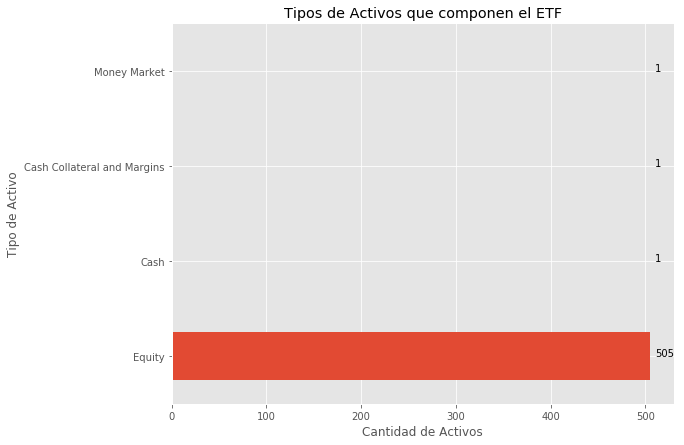

In [11]:
Class.plot(kind="barh",figsize=(9,7))
for k in range(4):
    plt.text(510,k,Class[k])
plt.title("Tipos de Activos que componen el ETF")
plt.xlabel("Cantidad de Activos")
plt.ylabel("Tipo de Activo")
plt.show()

**Conocer la ponderación de los activos (Frecuencia)**

In [12]:
Pesos = data_["Weight (%)"].values.tolist()
Pesos.sort()
Pesos[:10] # De manera Ascendente

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02]

In [13]:
trace=go.Histogram(x=Pesos, name="Ponderación de Activos en ETF")
layout= dict(title="Ponderación de Activos en ETF", xaxis=dict(zeroline=True),
            yaxis=dict(zeroline=False))
fig=dict(data = [trace],layout=layout)
py.iplot(fig,filename='Data')

**Información general por Sector**

In [14]:
Prom_Sector = pd.DataFrame(data_.groupby(["Sector"]).mean())
Sec = pd.DataFrame(data_.Sector.value_counts())
Merge = pd.merge(left=Prom_Sector,right=Sec,left_on=Prom_Sector.index.values,right_on=Sec.index.values)
Merge

,key_0,Weight (%),Sector
0,Cash and/or Derivatives,0.166667,3
1,Consumer Discretionary,0.150714,84
2,Consumer Staples,0.220588,34
3,Energy,0.170625,32
4,Financials,0.222239,67
5,Health Care,0.224918,61
6,Industrials,0.145714,70
7,Information Technology,0.368235,68
8,Materials,0.115600,25
9,Real Estate,0.078485,33


In [15]:
trace=go.Bar(x=Prom_Sector.values,y=Prom_Sector.index.values, name='Ponderación Promedio por Sector',text=Prom_Sector.index.values,orientation="h")
layout= dict(title='Ponderación Promedio por Sector', xaxis=dict(zeroline=True),
            yaxis=dict(zeroline=False))


fig=dict(data = [trace],layout=layout)
py.iplot(fig,filename='Data')

### <center> Predominación de activos en el portafolio.                                                                   <center> ¿Qué porcentaje de activos tienen más del 50% de presencia en el portafolio?

In [16]:
# Conocer si los activos están ordandos de manera decreciente en el dataset
orden = np.sum(data_["Weight (%)"].values==np.sort(data_["Weight (%)"])[::-1])/data_.shape[0]
if orden==1:
    print("Los activos están ordenados de manera decreciente en su ponderación.")

Los activos están ordenados de manera decreciente en su ponderación.


In [17]:
Porcentaje = .89
Activos = np.int(np.ceil(data_.shape[0]*Porcentaje))
Porc_Activos = np.sum(data_["Weight (%)"].values[::-1][:Activos]) #lo vuelve a hacer ascendente y lo cuento al revez cuanto la ponderacion hasta ese activo
Porc_Activos, Activos,data_.shape[0]-Activos
data_.shape[0]-Activos,100-Porc_Activos,Activos,Porc_Activos,np.round(Activos/(data_.shape[0]-Activos),3)

(55, 51.5, 453, 48.5, 8.236)

$$\text{En iShares Core S&P 500 ETF (Para Febrero 2018) cerca de 55 activos tenían una ponderación en el ETF de } 51.5\%. $$

$$\text{Esto significa que } 453\ \text{activos solo contaban con una partipación del } 48.5\%\ \text{en el mismo, lo cual indica que la parte}$$ 

$$\text{de activos más significativa en este portafolio es en promedio } 8.236 \text{ veces más importante que la parte inferior}$$ 

$$\text{ o con menos porcentaje de dicho portafolio.}$$

## Análsis Numérico

In [18]:
Nombres_archivos = ["Febrero_2017","Marzo_2017","Abril_2017","Mayo_2017","Junio_2017","Julio_2017","Agosto_2017",
                   "Septiembre_2017","Octubre_2017","Noviembre_2017","Diciembre_2017","Enero_2018","Febrero_2018"]

In [19]:
data_1 = pd.read_csv("../Datos/"+Nombres_archivos[0]+".csv",skiprows=10)
data_1.head()

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
0,AAPL,APPLE INC,Equity,3.58,136.99,"25,594,504.00","3,506,191,102.96","3,506,191,102.96",Information Technology,2046251,US0378331005,NASDAQ
1,MSFT,MICROSOFT CORP,Equity,2.44,63.98,"37,320,810.00","2,387,785,423.80","2,387,785,423.80",Information Technology,2588173,US5949181045,NASDAQ
2,XOM,EXXON MOBIL CORP,Equity,1.65,81.32,"19,903,660.00","1,618,565,631.20","1,618,565,631.20",Energy,2326618,US30231G1022,New York Stock Exchange Inc.
3,AMZN,AMAZON COM INC,Equity,1.63,845.04,"1,893,021.00","1,599,678,465.84","1,599,678,465.84",Consumer Discretionary,2000019,US0231351067,NASDAQ
4,JNJ,JOHNSON & JOHNSON,Equity,1.63,122.21,"13,058,249.00","1,595,848,610.29","1,595,848,610.29",Health Care,2475833,US4781601046,New York Stock Exchange Inc.


**Definir Función que descargará los precios**

In [20]:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    for ticker in tickers:
        try:
            df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
            closes[ticker]=df['Adj Close']
        except:
            continue
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [21]:
# Descargamos precios del S&P500(índice) para conocer su comportamiento.
df = web.YahooDailyReader(symbols="^GSPC",start="28/02/2017",end="28/02/2018", interval="d").read()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-28,2367.790039,2358.959961,2366.080078,2363.639893,4210140000,2363.639893
2017-03-01,2400.979980,2380.129883,2380.129883,2395.959961,4345180000,2395.959961
2017-03-02,2394.750000,2380.169922,2394.750000,2381.919922,3821320000,2381.919922
2017-03-03,2383.889893,2375.389893,2380.919922,2383.120117,3555260000,2383.120117
2017-03-06,2378.800049,2367.979980,2375.229980,2375.310059,3232700000,2375.310059


In [22]:
trace = go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])
layout= dict(title='Precio S&P500 de 28/02/2017 a 28/02/2018', xaxis=dict(zeroline=True),
            yaxis=dict(zeroline=True))
data = dict(data = [trace], layout = layout)
py.iplot(data, filename='simple_candlestick')

### Obtener Total Net Assets and Shares Outstanding en un solo DataFrame

In [23]:
Net_ASO = pd.read_csv("../Datos/"+Nombres_archivos[0]+".csv",error_bad_lines=False,warn_bad_lines=False)
Net_ASO = pd.DataFrame(Net_ASO.iloc[2:4,:])
column = Net_ASO.columns.values # Hay problemas con algunos csv's, por lo tanto, tomamos el valor de la colunmna correcta
index_val = Net_ASO.index.values # Lo mismo que arriba, pero tomamos valores de índices
Net_ASO

,iShares Core S&P 500 ETF
Total Net Assets,"97,843,780,499.36"
Shares Outstanding,"411,150,000.00"


In [24]:
# Construir función para tomar el de cada mes
for k in Nombres_archivos[1:]:
    data = pd.read_csv("../Datos/"+k+".csv",error_bad_lines=False,warn_bad_lines=False)
    data = data.iloc[2:4,:] 
    if data.shape[1]==1:
        Net_ASO = pd.concat([Net_ASO,data],axis=1)
    else:
        valores = data.iloc[:,1].values.tolist()
        data = pd.DataFrame(valores,columns=column, index=index_val)
        Net_ASO = pd.concat([Net_ASO,data],axis=1)

In [25]:
Net_ASO.columns = Nombres_archivos
Net_ASO

,Febrero_2017,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
Total Net Assets,"97,843,780,499.36","101,821,854,272.44","109,203,771,298.81","112,533,011,489.13","115,463,029,979.62","121,907,587,125.66","124,393,508,123.36","126,492,385,434.10","133,414,175,708.62","140,272,696,975.41","141,487,848,319.30","156,026,902,856.81","154,537,475,712.41"
Shares Outstanding,"411,150,000.00","429,250,000.00","455,700,000.00","463,100,000.00","474,400,000.00","490,800,000.00","499,300,000.00","500,000,000.00","515,350,000.00","525,750,000.00","526,950,000.00","549,650,000.00","565,250,000.00"


In [26]:
Net_ASO.dtypes # Esto representa un problema, pues no se puede efectuar operaciones, por lo tanto, se debe de pasar a float

Febrero_2017       object
Marzo_2017         object
Abril_2017         object
Mayo_2017          object
Junio_2017         object
Julio_2017         object
Agosto_2017        object
Septiembre_2017    object
Octubre_2017       object
Noviembre_2017     object
Diciembre_2017     object
Enero_2018         object
Febrero_2018       object
dtype: object

In [27]:
concatenar = ""
for k in Net_ASO.columns.values:
    for l in range(len(Net_ASO[k].values)):
        val = Net_ASO[k][l].split(",")
        for i in val:
            concatenar+=i
        concatenar = float(concatenar)
        Net_ASO[k][l] = concatenar
        concatenar=""
## Vuelve a aparecer en object porque cada columna debe de ser del mismo tipo, por lo tanto, cuando se convierte una casilla
## en float se vuelve a reescribir como object, sin embargo, ya se puede cambiar el dataframe a float cuando termina el ciclo,
## pues ya no hay comas entre los números que lo impidan.

In [28]:
Net_ASO = pd.DataFrame(Net_ASO,dtype=float) 
Net_ASO

,Febrero_2017,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
Total Net Assets,9.784378e+10,1.018219e+11,1.092038e+11,1.125330e+11,1.154630e+11,1.219076e+11,1.243935e+11,1.264924e+11,1.334142e+11,1.402727e+11,1.414878e+11,1.560269e+11,1.545375e+11
Shares Outstanding,4.111500e+08,4.292500e+08,4.557000e+08,4.631000e+08,4.744000e+08,4.908000e+08,4.993000e+08,5.000000e+08,5.153500e+08,5.257500e+08,5.269500e+08,5.496500e+08,5.652500e+08


In [29]:
Net_ASO.loc["Price"] = Net_ASO.iloc[0,:]/Net_ASO.iloc[1,:] # Cálcular Precios por mes (Una vez que el ETF está rebalanceado)
Net_ASO

,Febrero_2017,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
Total Net Assets,9.784378e+10,1.018219e+11,1.092038e+11,1.125330e+11,1.154630e+11,1.219076e+11,1.243935e+11,1.264924e+11,1.334142e+11,1.402727e+11,1.414878e+11,1.560269e+11,1.545375e+11
Shares Outstanding,4.111500e+08,4.292500e+08,4.557000e+08,4.631000e+08,4.744000e+08,4.908000e+08,4.993000e+08,5.000000e+08,5.153500e+08,5.257500e+08,5.269500e+08,5.496500e+08,5.652500e+08
Price,2.379759e+02,2.372087e+02,2.396396e+02,2.429994e+02,2.433875e+02,2.483855e+02,2.491358e+02,2.529848e+02,2.588807e+02,2.668049e+02,2.685034e+02,2.838659e+02,2.733967e+02


In [30]:
acciones_circulando =Net_ASO.iloc[1,:]
acciones_circulando

Febrero_2017       411150000.0
Marzo_2017         429250000.0
Abril_2017         455700000.0
Mayo_2017          463100000.0
Junio_2017         474400000.0
Julio_2017         490800000.0
Agosto_2017        499300000.0
Septiembre_2017    500000000.0
Octubre_2017       515350000.0
Noviembre_2017     525750000.0
Diciembre_2017     526950000.0
Enero_2018         549650000.0
Febrero_2018       565250000.0
Name: Shares Outstanding, dtype: float64

In [31]:
### Quedarse solo con el mes y no el año de los nombres de archivos
meses = [Nombres_archivos[0].split("_")[0]+"17"]
for k in Nombres_archivos[1:-1]:
    mes = k.split("_")[0]
    mes=mes[:3]
    meses.append(mes)
meses.append(Nombres_archivos[len(Nombres_archivos)-1].split("_")[0]+"18")
meses

['Febrero17',
 'Mar',
 'Abr',
 'May',
 'Jun',
 'Jul',
 'Ago',
 'Sep',
 'Oct',
 'Nov',
 'Dic',
 'Ene',
 'Febrero18']

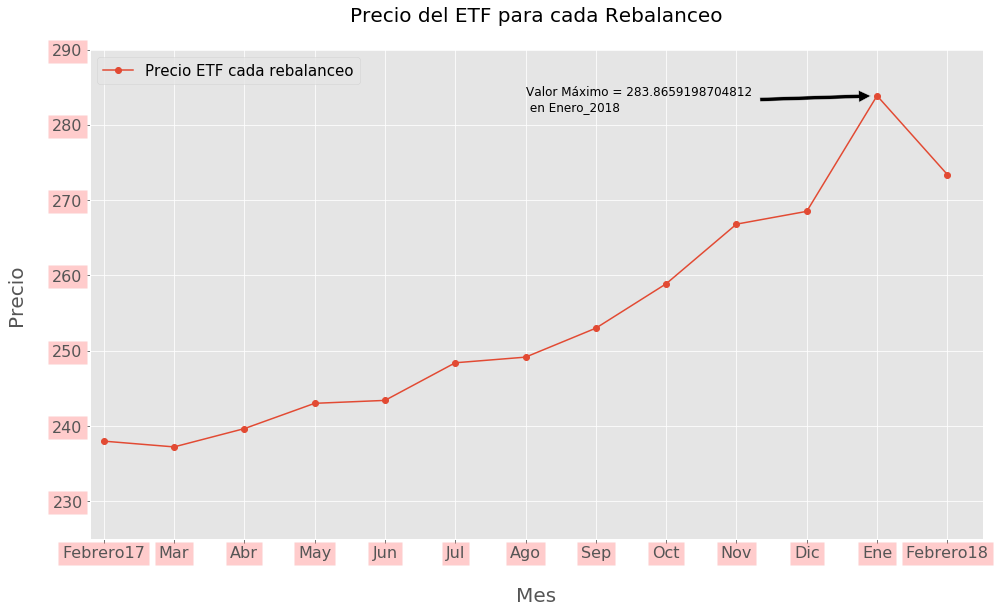

In [32]:
style.use("ggplot")
plt.figure(facecolor="white",figsize=(16,9))
plt.plot(np.arange(len(meses)),Net_ASO.loc["Price"].values,'o-',label="Precio ETF cada rebalanceo")
plt.xticks(np.arange(len(meses)),meses)
plt.legend(loc="upper left",fontsize=15)
plt.ylim([225,290])
plt.xlim([-.2,12.5])
plt.title("Precio del ETF para cada Rebalanceo\n",size=20)
plt.ylabel("Precio\n",size=20)
plt.xlabel("\nMes",size=20)


# Get current Axis
ax = plt.gca() # Da acceso a los ejes del dibujo actual
ax.spines['right'].set_color('none') # Nos da acceso a los bordes del gráfico.
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.annotate("Valor Máximo = {}\n en {}".format(Net_ASO.loc["Price"].values[len(Net_ASO.loc["Price"].values)-2],Nombres_archivos[len(meses)-2]),
             xy=((np.arange(len(meses))[len(meses)-2],Net_ASO.loc["Price"].values[len(Net_ASO.loc["Price"].values)-2])),
             xytext=(np.arange(len(meses))[len(meses)-7],Net_ASO.loc["Price"].values[len(Net_ASO.loc["Price"].values)-2]-2),
             arrowprops=dict(facecolor="black",shrink = 0.05),size=12)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='red',edgecolor=None,alpha=0.2))
plt.show()

In [33]:
Net_ASO.loc["Price"].values

array([237.97587377, 237.20874612, 239.63961224, 242.999377  ,
       243.38749996, 248.38546684, 249.13580638, 252.98477087,
       258.88071351, 266.80493956, 268.50336525, 283.86591987,
       273.39668414])

### Obtener Nombre de activo y su ponderación para cada documento

In [34]:
act_peso = pd.read_csv("../Datos/"+Nombres_archivos[0]+".csv",skiprows=10)
act_peso = act_peso.iloc[:,[0,3]][:-2]
print(act_peso.shape);act_peso.tail()

(508, 2)


,Ticker,Weight (%)
503,FSLR,0.01
504,ENDP,0.01
505,URBN,0.01
506,UBFUT,0.01
507,NWS,0.01


In [35]:
for k in Nombres_archivos[1:]:
    data_peso = pd.read_csv("../Datos/"+k+".csv",skiprows=10)
    peso = data_peso.iloc[:,[0,3]][:-2] # Removemos los últimos dos que no son precios
    act_peso = pd.concat([act_peso,peso],axis=1)

In [36]:
act_peso.head()

,Ticker,Weight (%),Ticker,Weight (%),Ticker,Weight (%),Ticker,Peso (%),Ticker,Peso (%),...,Ticker,Weight (%),Ticker,Weight (%),Ticker,Weight (%),Ticker,Weight (%),Ticker,Weight (%)
0,AAPL,3.58,AAPL,3.71,AAPL,3.67,AAPL,3.86,AAPL,3.61,...,AAPL,3.94,AAPL,3.90,AAPL,3.80,AAPL,3.56,AAPL,3.93
1,MSFT,2.44,MSFT,2.50,MSFT,2.58,MSFT,2.60,MSFT,2.56,...,MSFT,2.89,MSFT,2.85,MSFT,2.89,MSFT,3.03,MSFT,3.11
2,XOM,1.65,AMZN,1.73,AMZN,1.78,AMZN,1.90,AMZN,1.85,...,AMZN,1.99,AMZN,2.06,AMZN,2.05,AMZN,2.40,AMZN,2.60
3,AMZN,1.63,XOM,1.67,FB,1.72,FB,1.72,FB,1.71,...,FB,1.93,FB,1.84,FB,1.84,FB,1.84,FB,1.83
4,JNJ,1.63,JNJ,1.66,XOM,1.65,JNJ,1.68,JNJ,1.71,...,JNJ,1.69,JNJ,1.64,BRKB,1.67,BRKB,1.71,JPM,1.72


In [37]:
sub_act_peso = act_peso.iloc[:,0::2]
sub_act_peso.head()

,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker
0,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
2,XOM,AMZN,AMZN,AMZN,AMZN,FB,FB,FB,AMZN,AMZN,AMZN,AMZN,AMZN
3,AMZN,XOM,FB,FB,FB,AMZN,AMZN,AMZN,FB,FB,FB,FB,FB
4,JNJ,JNJ,XOM,JNJ,JNJ,JNJ,JNJ,BRKB,JNJ,JNJ,BRKB,BRKB,JPM


### Descargar datos para conocer el precio del ETF durante el mes (NAV)

In [38]:
fechas = np.array([["28/02/2017","28/03/2017"],
         ["28/03/2017","28/04/2017"],
         ["28/04/2017","28/05/2017"],
         ["28/05/2017","28/06/2017"],
         ["28/06/2017","28/07/2017"],
         ["28/07/2017","28/08/2017"],
         ["28/08/2017","28/09/2017"],
         ["28/09/2017","28/10/2017"],
         ["28/10/2017","28/11/2017"],
         ["28/11/2017","28/12/2017"],
         ["28/12/2017","28/01/2018"],
         ["28/01/2018","28/02/2018"]])
fechas.shape

(12, 2)

**Obtener Shares del ETF en el mes**

In [39]:
shares = pd.read_csv("../Datos/"+Nombres_archivos[0]+".csv",skiprows=10)
shares = shares.iloc[:,5][:-2]
shares.shape

(508,)

In [40]:
for k in Nombres_archivos[1:]:
    data = pd.read_csv("../Datos/"+k+".csv",skiprows=10)
    data = data.iloc[:,5][:-2]
    shares = pd.concat([shares,data],axis=1)
shares.columns = Nombres_archivos

In [41]:
shares.head()

,Febrero_2017,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
0,"25,594,504.00","26,287,151.00","27,891,639.00","28,422,778.00","29,011,089.00","30,015,436.00","30,583,370.00","30,311,621.00","31,133,333.00","31,825,851.00","31,761,654.00","33,299,304.00","34,128,429.00"
1,"37,320,810.00","38,717,851.00","41,081,091.00","41,863,370.00","42,958,853.00","44,446,066.00","45,287,040.00","45,199,779.00","46,424,867.00","47,457,714.00","47,723,487.00","50,033,787.00","51,279,537.00"
2,"19,903,660.00","1,984,366.00","2,105,410.00","2,145,589.00","2,207,444.00","13,607,736.00","13,865,221.00","13,910,033.00","2,403,185.00","2,456,752.00","2,474,160.00","2,594,010.00","2,658,635.00"
3,"1,893,021.00","20,775,604.00","12,520,797.00","12,758,976.00","13,152,399.00","2,283,851.00","2,327,071.00","2,339,809.00","14,287,025.00","14,604,929.00","14,752,657.00","15,466,657.00","15,851,657.00"
4,"13,058,249.00","13,594,908.00","22,043,684.00","14,699,377.00","14,989,132.00","15,508,046.00","15,801,494.00","11,291,685.00","16,177,840.00","16,537,634.00","11,904,651.00","12,480,951.00","23,063,215.00"


In [42]:
### Convertir todo a float
st = ""
for k in shares.columns.values.tolist():
    for l in range(shares[k].shape[0]):
        try:
            val = shares[k][l].split(",")
            for i in val:
                st = st+i
            shares[k][l] = st
            st=""
        except:
            pass
                

In [43]:
shares = pd.DataFrame(shares,dtype=np.float32)
shares.head()

,Febrero_2017,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
0,25594504.0,26287152.0,27891640.0,28422778.0,29011088.0,30015436.0,30583370.0,30311620.0,31133332.0,31825852.0,31761654.0,33299304.0,34128428.0
1,37320808.0,38717852.0,41081092.0,41863368.0,42958852.0,44446064.0,45287040.0,45199780.0,46424868.0,47457712.0,47723488.0,50033788.0,51279536.0
2,19903660.0,1984366.0,2105410.0,2145589.0,2207444.0,13607736.0,13865221.0,13910033.0,2403185.0,2456752.0,2474160.0,2594010.0,2658635.0
3,1893021.0,20775604.0,12520797.0,12758976.0,13152399.0,2283851.0,2327071.0,2339809.0,14287025.0,14604929.0,14752657.0,15466657.0,15851657.0
4,13058249.0,13594908.0,22043684.0,14699377.0,14989132.0,15508046.0,15801494.0,11291685.0,16177840.0,16537634.0,11904651.0,12480951.0,23063216.0


**Descargar Datos y Validar que realmente no se encuentran en la base de datos de Yahoo**

In [44]:
# Crear diccionario que tenga todos los precios del nav
dic_precios_nav ={}
for k in meses:
    dic_precios_nav[k] = []
dic_precios_nav

{'Febrero17': [],
 'Mar': [],
 'Abr': [],
 'May': [],
 'Jun': [],
 'Jul': [],
 'Ago': [],
 'Sep': [],
 'Oct': [],
 'Nov': [],
 'Dic': [],
 'Ene': [],
 'Febrero18': []}

In [45]:
fechas

array([['28/02/2017', '28/03/2017'],
       ['28/03/2017', '28/04/2017'],
       ['28/04/2017', '28/05/2017'],
       ['28/05/2017', '28/06/2017'],
       ['28/06/2017', '28/07/2017'],
       ['28/07/2017', '28/08/2017'],
       ['28/08/2017', '28/09/2017'],
       ['28/09/2017', '28/10/2017'],
       ['28/10/2017', '28/11/2017'],
       ['28/11/2017', '28/12/2017'],
       ['28/12/2017', '28/01/2018'],
       ['28/01/2018', '28/02/2018']], dtype='<U10')

In [46]:
nombres_navs = ["get_prices"+Nombres_archivos[l]+"Prices.csv" for l in range(12)]
nombres_navs

['get_pricesFebrero_2017Prices.csv',
 'get_pricesMarzo_2017Prices.csv',
 'get_pricesAbril_2017Prices.csv',
 'get_pricesMayo_2017Prices.csv',
 'get_pricesJunio_2017Prices.csv',
 'get_pricesJulio_2017Prices.csv',
 'get_pricesAgosto_2017Prices.csv',
 'get_pricesSeptiembre_2017Prices.csv',
 'get_pricesOctubre_2017Prices.csv',
 'get_pricesNoviembre_2017Prices.csv',
 'get_pricesDiciembre_2017Prices.csv',
 'get_pricesEnero_2018Prices.csv']

In [47]:
# Cálcular NAV del mes
contador = 0
for k in nombres_navs:
    get_prices = pd.read_csv("../Datos/"+k,index_col="Date")
    for row in range(get_prices.shape[0]):
        shares_utilizar = shares.iloc[:,contador].dropna().values
        get_prices_utilizar = get_prices.iloc[row,:].dropna().values
        dic_precios_nav[meses[contador]].append(np.sum((get_prices_utilizar*shares_utilizar))/acciones_circulando[contador])

    contador +=1

In [48]:
# Se tiene que modificar la longuitud o agregar nan's en los meses menores a 24 (el máximo)
for k in dic_precios_nav.keys():
    longuitud = len(dic_precios_nav[k])
    if longuitud<24:
        dic_precios_nav[k].extend(np.tile(np.nan,24-longuitud))

In [49]:
for k in dic_precios_nav.keys():
    print(len(dic_precios_nav[k]))

24
24
24
24
24
24
24
24
24
24
24
24
24


In [50]:
precios_nav = pd.DataFrame(dic_precios_nav)
precios_nav["Ene"] = precios_nav["Ene"]/2
precios_nav_copia = precios_nav.copy() # Se utilizará para los modelos de predicción
precios_nav = precios_nav.iloc[:,:-1]
precios_nav.columns = Nombres_archivos[1:] # Se ponen los nombres de las columnas de manera apropiada.
precios_nav

,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
0,234.456410,231.621184,234.449597,247.855326,238.797190,244.968924,239.261473,252.413047,262.291353,282.299729,280.802838,281.942037
1,237.567942,231.915872,234.908742,247.687208,236.692200,244.738853,239.496548,253.474871,262.729104,280.052501,279.265502,280.274519
2,236.176050,232.613718,235.055091,249.333162,237.004422,245.333294,240.634772,254.409425,259.456739,282.474348,281.371188,280.409011
3,236.346852,232.182543,234.951156,250.606881,237.302292,245.529983,241.962894,254.973056,259.624242,281.469568,283.413337,280.230330
4,235.553512,231.733735,235.089499,250.445722,237.916736,244.962254,242.442640,255.275639,260.815182,279.883289,284.506159,277.275335
5,235.082326,231.832178,235.964891,249.857445,235.872850,245.353224,240.747008,256.709534,261.344829,278.966770,286.438310,271.619615
6,234.656619,231.168977,236.049211,250.455795,237.399625,246.008185,241.511864,256.625222,261.480087,279.156470,287.249872,274.068667
7,234.890009,231.577566,235.944326,251.006266,237.760658,245.483946,241.606171,256.395350,261.933486,280.265199,287.125608,273.363272
8,235.808196,231.437872,236.476548,249.223061,237.681179,245.453071,241.152928,257.067849,260.727245,281.489816,286.263066,268.296189
9,235.924179,231.480181,236.136104,248.908835,239.461145,241.885273,243.651604,257.623396,260.761758,282.517243,288.333442,270.377070


In [51]:
precios_nav.to_csv("../Datos/PreciosNAVMensuales.csv")
dic_precios_nav = pd.read_csv("../Datos/PreciosNAVMensuales.csv").iloc[:,1:]
dic_precios_nav.head()

,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
0,234.456410,231.621184,234.449597,247.855326,238.797190,244.968924,239.261473,252.413047,262.291353,282.299729,280.802838,281.942037
1,237.567942,231.915872,234.908742,247.687208,236.692200,244.738853,239.496548,253.474871,262.729104,280.052501,279.265502,280.274519
2,236.176050,232.613718,235.055091,249.333162,237.004422,245.333294,240.634772,254.409425,259.456739,282.474348,281.371188,280.409011
3,236.346852,232.182543,234.951156,250.606881,237.302292,245.529983,241.962894,254.973056,259.624242,281.469568,283.413337,280.230330
4,235.553512,231.733735,235.089499,250.445722,237.916736,244.962254,242.442640,255.275639,260.815182,279.883289,284.506159,277.275335


In [52]:
Nombres_archivos = Nombres_archivos[1:]
Nombres_archivos

['Marzo_2017',
 'Abril_2017',
 'Mayo_2017',
 'Junio_2017',
 'Julio_2017',
 'Agosto_2017',
 'Septiembre_2017',
 'Octubre_2017',
 'Noviembre_2017',
 'Diciembre_2017',
 'Enero_2018',
 'Febrero_2018']

### <center> Gráficar el precio del NAV durante el último año para cada mes

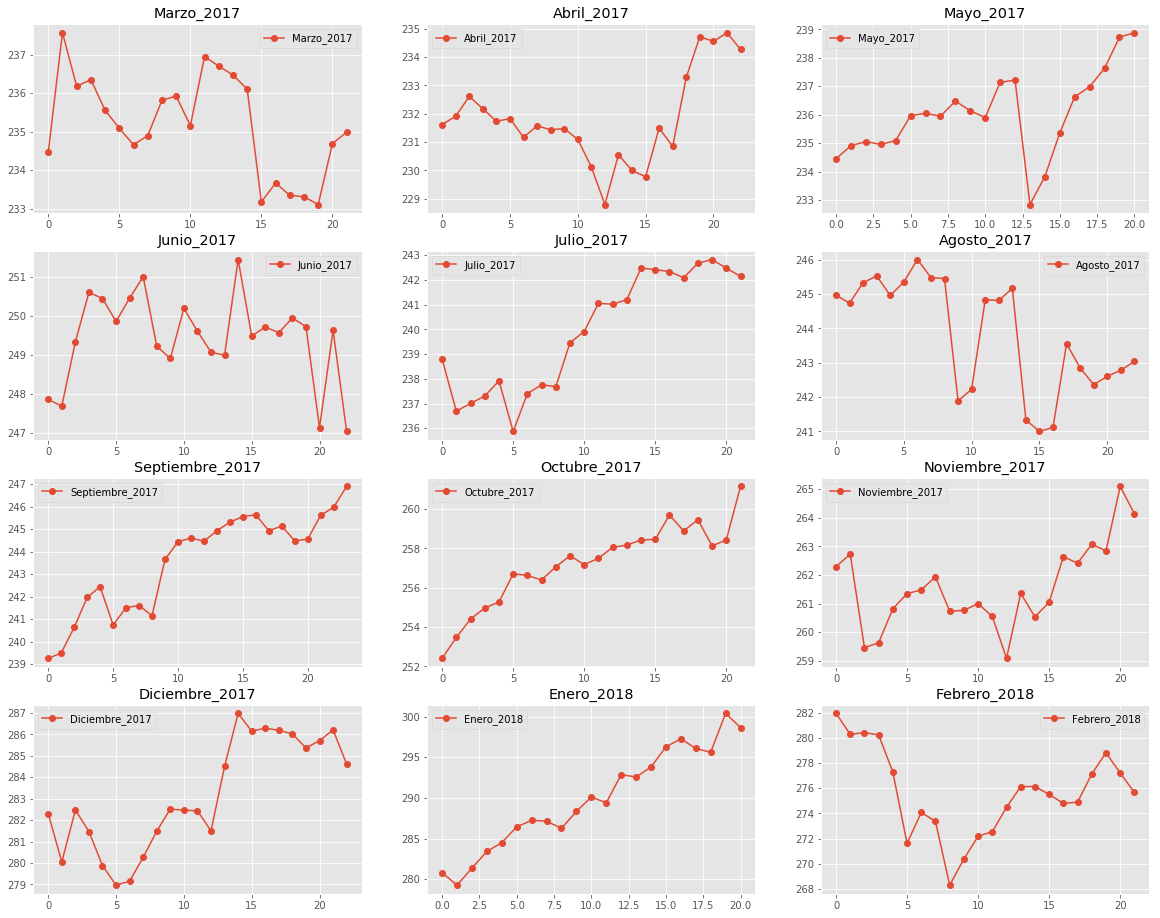

In [53]:
fig,axes = plt.subplots(4,3,figsize=(20,16))
axes[0,0].set_title(Nombres_archivos[0])
axes[0,0].plot(dic_precios_nav[Nombres_archivos[0]],"o-",label=Nombres_archivos[0])
axes[0,0].legend(loc="best")
axes[0,1].set_title(Nombres_archivos[1])
axes[0,1].plot(dic_precios_nav[Nombres_archivos[1]],"o-",label=Nombres_archivos[1])
axes[0,1].legend(loc="best")
axes[0,2].set_title(Nombres_archivos[2])
axes[0,2].plot(dic_precios_nav[Nombres_archivos[2]],"o-",label=Nombres_archivos[2])
axes[0,2].legend(loc="best")
axes[1,0].set_title(Nombres_archivos[3])
axes[1,0].plot(dic_precios_nav[Nombres_archivos[3]],"o-",label=Nombres_archivos[3])
axes[1,0].legend(loc="best")
axes[1,1].set_title(Nombres_archivos[4])
axes[1,1].plot(dic_precios_nav[Nombres_archivos[4]],"o-",label=Nombres_archivos[4])
axes[1,1].legend(loc="best")
axes[1,2].set_title(Nombres_archivos[5])
axes[1,2].plot(dic_precios_nav[Nombres_archivos[5]],"o-",label=Nombres_archivos[5])
axes[1,2].legend(loc="best")
axes[2,0].set_title(Nombres_archivos[6])
axes[2,0].plot(dic_precios_nav[Nombres_archivos[6]],"o-",label=Nombres_archivos[6])
axes[2,0].legend(loc="best")
axes[2,1].set_title(Nombres_archivos[7])
axes[2,1].plot(dic_precios_nav[Nombres_archivos[7]],"o-",label=Nombres_archivos[7])
axes[2,1].legend(loc="best")
axes[2,2].set_title(Nombres_archivos[8])
axes[2,2].plot(dic_precios_nav[Nombres_archivos[8]],"o-",label=Nombres_archivos[8])
axes[2,2].legend(loc="best")
axes[3,0].set_title(Nombres_archivos[9])
axes[3,0].plot(dic_precios_nav[Nombres_archivos[9]],"o-",label=Nombres_archivos[9])
axes[3,0].legend(loc="best")
axes[3,1].set_title(Nombres_archivos[10])
axes[3,1].plot(dic_precios_nav[Nombres_archivos[10]],"o-",label=Nombres_archivos[10])
axes[3,1].legend(loc="best")
axes[3,2].set_title(Nombres_archivos[11])
axes[3,2].plot(dic_precios_nav[Nombres_archivos[11]],"o-",label=Nombres_archivos[11])
axes[3,2].legend(loc="best")

plt.show()

## <font color="red">Política de rebalanceo de pesos

$$\text{Se tomarán a consideración 3 distintas políticas de rebalanceo. Se sabe con anterioridad, que cada activo en el ETF con}$$
$$\text{cual se está trabajando, se rebalancea de manera periódica según la capitalización de cada activo en el mercado, por lo}$$
$$\text{tanto, aquellos activos que tengan mayor rendimiento o una nueva emisión de acciones tendrán una mayor ponderación en el portafolio.}$$

$$\text{Sin embargo, esto puede llegar a sesgar un poco el comportamiento del portafolio a largo plazo, pues existe una gran}$$
$$\text{ posibilidad de que los activos con mayor capitalización en el mercado no tengan mucha variación en el precio y su}$$
$$\text{capitalización se mantenga constante provocando un rendimiento nulo, pero una ponderación significativa en el portafolio que no sufre}$$
$$\text{penalización alguna por su falta de efectividad en dicho portafolio. Por lo mismo, hemos decidido aplicar las 3}$$ $$\text{siguientes 3 políticas de rebalanceo para el ETF en el cuál se está trabajando.}$$

<font color="blue"> Perfil Agresivo (Maximizar Rendimiento)</font>
- **Se tomará el 10% de los activos que hubiesen tenído el peor desempeño durante el mes y se les disminuirá su participación en un 25%. Los activos que hubiesen tenido un rendimiento superior (el 10% de los activos que conforman el portafolio) se les asignará de manera ponderada el 25% del peso que se les quitó a los de peor rendimiento.** 

<font color="blue"> Perfil  Conservador (Minimizar Volatilidad) </font>
- **Se tomará el 10% de los activos que hubiesen tenido la mayor volatilidad durante el mes y se les disminuirá su participación en u 25%. Los activos que hubiesen tenido una volatilidad menor (el 10%) se les sumara de manera ponderada el 25% que se les quitó a los de mayor volatilidad**

<font color="blue"> Maximizar el Radio de Sharp  </font>
- **Se maximizará el Radio de Sharp**


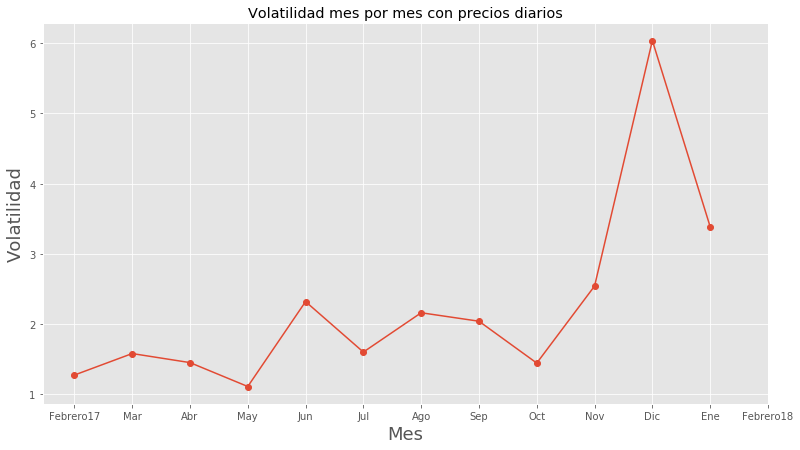

In [54]:
### Gráfica de la volatilidad del NAV durante cada mes
volatilidades = []
for k in dic_precios_nav.columns.values:
    volatilidades.append(np.std(dic_precios_nav[k]))
fig,ax = plt.subplots(1,1,figsize=(13,7))
ax.plot(np.arange(len(meses[1:])),volatilidades,"o-")
plt.xticks(np.arange(len(meses)),meses)
ax.set_title("Volatilidad mes por mes con precios diarios")
ax.set_xlabel("Mes",size=18)
ax.set_ylabel("Volatilidad",size=18)
plt.show()

## <font color="blue">  Perfil Agresivo (Maximizar Rendimiento)</font>

**Con el fin de llevar a cabo el rebalanceo se determinará el precio del ETF únicamente multiplicando su ponderación por el precio.**

In [55]:
# Calcular los precios del ETF a partir de su ponderación en el portafolio
Nombres_archivos = ["Febrero_2017","Marzo_2017","Abril_2017","Mayo_2017","Junio_2017","Julio_2017","Agosto_2017",
                   "Septiembre_2017","Octubre_2017","Noviembre_2017","Diciembre_2017","Enero_2018","Febrero_2018"]
data = pd.read_csv("../Datos/"+Nombres_archivos[0]+".csv",skiprows=10)
peso_precio = data_peso.iloc[:,[0,3,4]][:-2] # Removemos los últimos dos que no son precios
for k in Nombres_archivos[1:]:
    data_peso = pd.read_csv("../Datos/"+k+".csv",skiprows=10)
    pp = data_peso.iloc[:,[0,3,4]][:-2] # Removemos los últimos dos que no son precios
    peso_precio = pd.concat([peso_precio,pp],axis=1)

In [56]:
peso_precio.shape

(510, 39)

In [57]:
precio = peso_precio.iloc[:,2::3] # Solo precios
precio.columns = Nombres_archivos
peso = peso_precio.iloc[:,1::3] # Solo pesos
tickers = peso_precio.iloc[:,0::3]
peso.columns = Nombres_archivos
data_precio_flaot = pd.DataFrame()
num=""
# Pasar a float los números
for k in precio.columns.values:
    for l in range(len(precio[k].dropna().values)):
        val = precio[k][l].split(",")
        for d in val:
            num=num+d
        precio[k][l] = np.float(num)
        num=""

In [58]:
precios_mensuales = np.sum(peso/100*precio)
peso = peso/100

In [59]:
precios_mensuales.values

array([189.648534, 135.804497, 142.443148, 150.083251, 147.165546,
       152.149505, 152.516848, 152.821309, 162.496998, 165.959945,
       166.597301, 190.707755, 189.648534])

In [60]:
# Conocer los 10 más altos y los 10 más bajos (Esto se realiza con los precios calculados del NAV)
data = pd.read_csv("../Datos/"+nombres_navs[0],index_col="Date")
promedio_mes1 = pd.DataFrame(data.pct_change().mean(),columns=["Mean"])
# Se realizará a partir de quantiles
mas_altos = promedio_mes1[(promedio_mes1>=np.quantile(promedio_mes1,0.9)).values]
mas_bajos = promedio_mes1[(promedio_mes1<=np.quantile(promedio_mes1,0.1)).values]

In [61]:
# Crear función que itere por todos los documentos y obtenga cuales son los más altos y los más bajos y se concatene a los 
# ya realizados.
for k in range(1,12):
    data = pd.read_csv("../Datos/"+nombres_navs[k],index_col="Date")
    promedio_mes1 = pd.DataFrame(data.pct_change().mean(),columns=["Mean"])
    # Se realizará a partir de quantiles
    altos = promedio_mes1[(promedio_mes1>=np.quantile(promedio_mes1,0.9)).values]
    bajos = promedio_mes1[(promedio_mes1<=np.quantile(promedio_mes1,0.1)).values]
    mas_altos = pd.concat([mas_altos,altos],axis=1,sort=True)
    mas_bajos = pd.concat([mas_bajos,bajos],axis=1,sort=True)

In [62]:
mas_altos.shape, mas_bajos.shape # Están todos los de cada mes  

((327, 12), (329, 12))

In [63]:
# Necesario para poder rebalancear
Nombres_archivos = ["Febrero_2017","Marzo_2017","Abril_2017","Mayo_2017","Junio_2017","Julio_2017","Agosto_2017",
                   "Septiembre_2017","Octubre_2017","Noviembre_2017","Diciembre_2017","Enero_2018","Febrero_2018"]
tickers= tickers.iloc[:,1:]
peso = peso.iloc[:,1:]
tickers.columns = Nombres_archivos[1:]
tickers.shape,peso.shape

((510, 12), (510, 12))

In [64]:
# Empezar rebalaceo
## Calculo de los pesos
nuevos_pesos = pd.DataFrame()
rebalanceos = []
contador = 3
for k in range(tickers.shape[1]):
    if k==0:
        # Unir ticker con peso y trabajar uno a uno
        data_concatenada = pd.concat([tickers.iloc[:,k].dropna(),peso.iloc[:,k].dropna()],axis=1)
        data_concatenada.index = data_concatenada.iloc[:,0] # estamos haciendo los tickers el indice
        data_concatenada = pd.DataFrame(data_concatenada.iloc[:,1]) #estamos eliminando la columna de tickers

        # Quitar el 25% a los más bajos
        modificas_baja = data_concatenada.loc[mas_bajos.iloc[:,k].dropna().index.values.tolist(),:].dropna()*.75
        diferencia = np.sum(modificas_baja)/.75-np.sum(modificas_baja)
        # Ponderar y sumar a las altas
        ponderaciones =  (data_concatenada.loc[mas_altos.iloc[:,k].dropna().index.values.tolist(),:])/np.sum(data_concatenada.loc[mas_altos.iloc[:,k].dropna().index.values.tolist(),:])
        respectivo_porcentaje = pd.DataFrame(ponderaciones*diferencia)
        modificas_alta = data_concatenada.loc[mas_altos.iloc[:,k].dropna().index.values.tolist(),:].dropna()+respectivo_porcentaje.dropna()

        # Reasignar
        data_concatenada.loc[modificas_baja.index.values,:] = modificas_baja
        data_concatenada.loc[modificas_alta.index.values,:] = modificas_alta
    elif k>0: # Hago esto para unir todos los pesos en un dataset. 
        data_concatenadas = pd.concat([tickers.iloc[:,k].dropna(),peso.iloc[:,k].dropna()],axis=1)
        data_concatenadas.index = data_concatenadas.iloc[:,0]
        data_concatenadas = pd.DataFrame(data_concatenadas.iloc[:,1])

        # Quitar el 25% a los más bajos
        modificas_baja = data_concatenadas.loc[mas_bajos.iloc[:,k].dropna().index.values.tolist(),:].dropna()*.75
        diferencia = np.sum(modificas_baja)/.75-np.sum(modificas_baja)
        # Ponderar y sumar a las altas
        ponderaciones =  (data_concatenadas.loc[mas_altos.iloc[:,k].dropna().index.values.tolist(),:])/np.sum(data_concatenadas.loc[mas_altos.iloc[:,k].dropna().index.values.tolist(),:])
        respectivo_porcentaje = pd.DataFrame(ponderaciones*diferencia)
        modificas_alta = data_concatenadas.loc[mas_altos.iloc[:,k].dropna().index.values.tolist(),:].dropna()+respectivo_porcentaje.dropna()

        # Reasignar
        data_concatenadas.loc[modificas_baja.index.values,:] = modificas_baja
        data_concatenadas.loc[modificas_alta.index.values,:] = modificas_alta

        # Unir todos los pesos en un nuevo dataset
        data_concatenada = pd.concat([data_concatenada,data_concatenadas],axis=1)

In [65]:
data_concatenada.head() # Están ordenados

,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
A,0.000800,0.0009,0.000978,0.000900,0.0009,0.001089,0.001000,0.001000,0.001000,0.000675,0.001000,0.001000
AAL,0.000825,0.0011,0.001304,0.001200,0.0012,0.000750,0.001000,0.000900,0.001000,0.001000,0.001000,0.001108
AAP,0.000500,0.0005,0.000500,0.000300,0.0004,0.000225,0.000300,0.000225,0.000407,0.000300,0.000444,0.000400
AAPL,0.037100,0.0367,0.041931,0.027075,0.0366,0.043873,0.027600,0.039400,0.039000,0.038000,0.035600,0.043563
ABBV,0.006585,0.0051,0.005100,0.007130,0.0052,0.006096,0.009519,0.006500,0.006800,0.006700,0.008217,0.007900


In [66]:
contador = 0
for k in range(peso_precio.iloc[:,2::3].shape[1]):
    peso_precio.iloc[:,2+contador] = precio.iloc[:,k]
    contador+=3

In [67]:
peso_precio = peso_precio.drop(["Weight (%)","Peso (%)"],axis=1)
peso_precio.head()

,Ticker,Price,Ticker,Price,Ticker,Price,Ticker,Precio,Ticker,Precio,...,Ticker,Price,Ticker,Price,Ticker,Price,Ticker,Price,Ticker,Price
0,AAPL,178.12,AAPL,178.12,AAPL,178.12,AAPL,148.73,AAPL,148.73,...,AAPL,178.12,AAPL,178.12,AAPL,178.12,AAPL,178.12,AAPL,178.12
1,MSFT,93.77,MSFT,93.77,MSFT,93.77,MSFT,72.7,MSFT,72.7,...,MSFT,93.77,MSFT,93.77,MSFT,93.77,MSFT,93.77,MSFT,93.77
2,AMZN,1512.45,AMZN,1512.45,AMZN,1512.45,AMZN,169.25,AMZN,169.25,...,AMZN,1512.45,AMZN,1512.45,AMZN,1512.45,AMZN,1512.45,AMZN,1512.45
3,FB,178.32,XOM,178.32,FB,178.32,FB,987.78,FB,987.78,...,FB,178.32,FB,178.32,FB,178.32,FB,178.32,FB,178.32
4,JPM,115.5,JNJ,115.5,XOM,115.5,JNJ,132.72,JNJ,132.72,...,JNJ,115.5,JNJ,115.5,BRKB,115.5,BRKB,115.5,JPM,115.5


In [68]:
# Obtener nuevos precios después del rebalanceo una vez ordenados los datos
contador=1; nuevos_precios = []
for k in range(0,12):
    data = peso_precio.iloc[:,[0,contador]]
    data.index = data.iloc[:,0]
    data = data.iloc[:,1]
    prec = np.sum(data.sort_index()*data_concatenada.iloc[:,k])
    nuevos_precios.append(prec)
    contador+=2

In [69]:
# Escenarios
escenarios = []
for k in range(12,0,-1):
    a =precios_mensuales[:-(k)].values
    b = nuevos_precios[-k:]
    c = np.concatenate([a,b])
    escenarios.append(c)
len(escenarios)

12

In [70]:
# Crear nombres para plots
Label = "Se inicia el rebalanceo a partir de :"
names = [Label+" "+Nombres_archivos[l] for l in range(1,13)]
primer_mes = ["Precio sin rebalancear"]
primer_mes.extend(names)
primer_mes

['Precio sin rebalancear',
 'Se inicia el rebalanceo a partir de : Marzo_2017',
 'Se inicia el rebalanceo a partir de : Abril_2017',
 'Se inicia el rebalanceo a partir de : Mayo_2017',
 'Se inicia el rebalanceo a partir de : Junio_2017',
 'Se inicia el rebalanceo a partir de : Julio_2017',
 'Se inicia el rebalanceo a partir de : Agosto_2017',
 'Se inicia el rebalanceo a partir de : Septiembre_2017',
 'Se inicia el rebalanceo a partir de : Octubre_2017',
 'Se inicia el rebalanceo a partir de : Noviembre_2017',
 'Se inicia el rebalanceo a partir de : Diciembre_2017',
 'Se inicia el rebalanceo a partir de : Enero_2018',
 'Se inicia el rebalanceo a partir de : Febrero_2018']

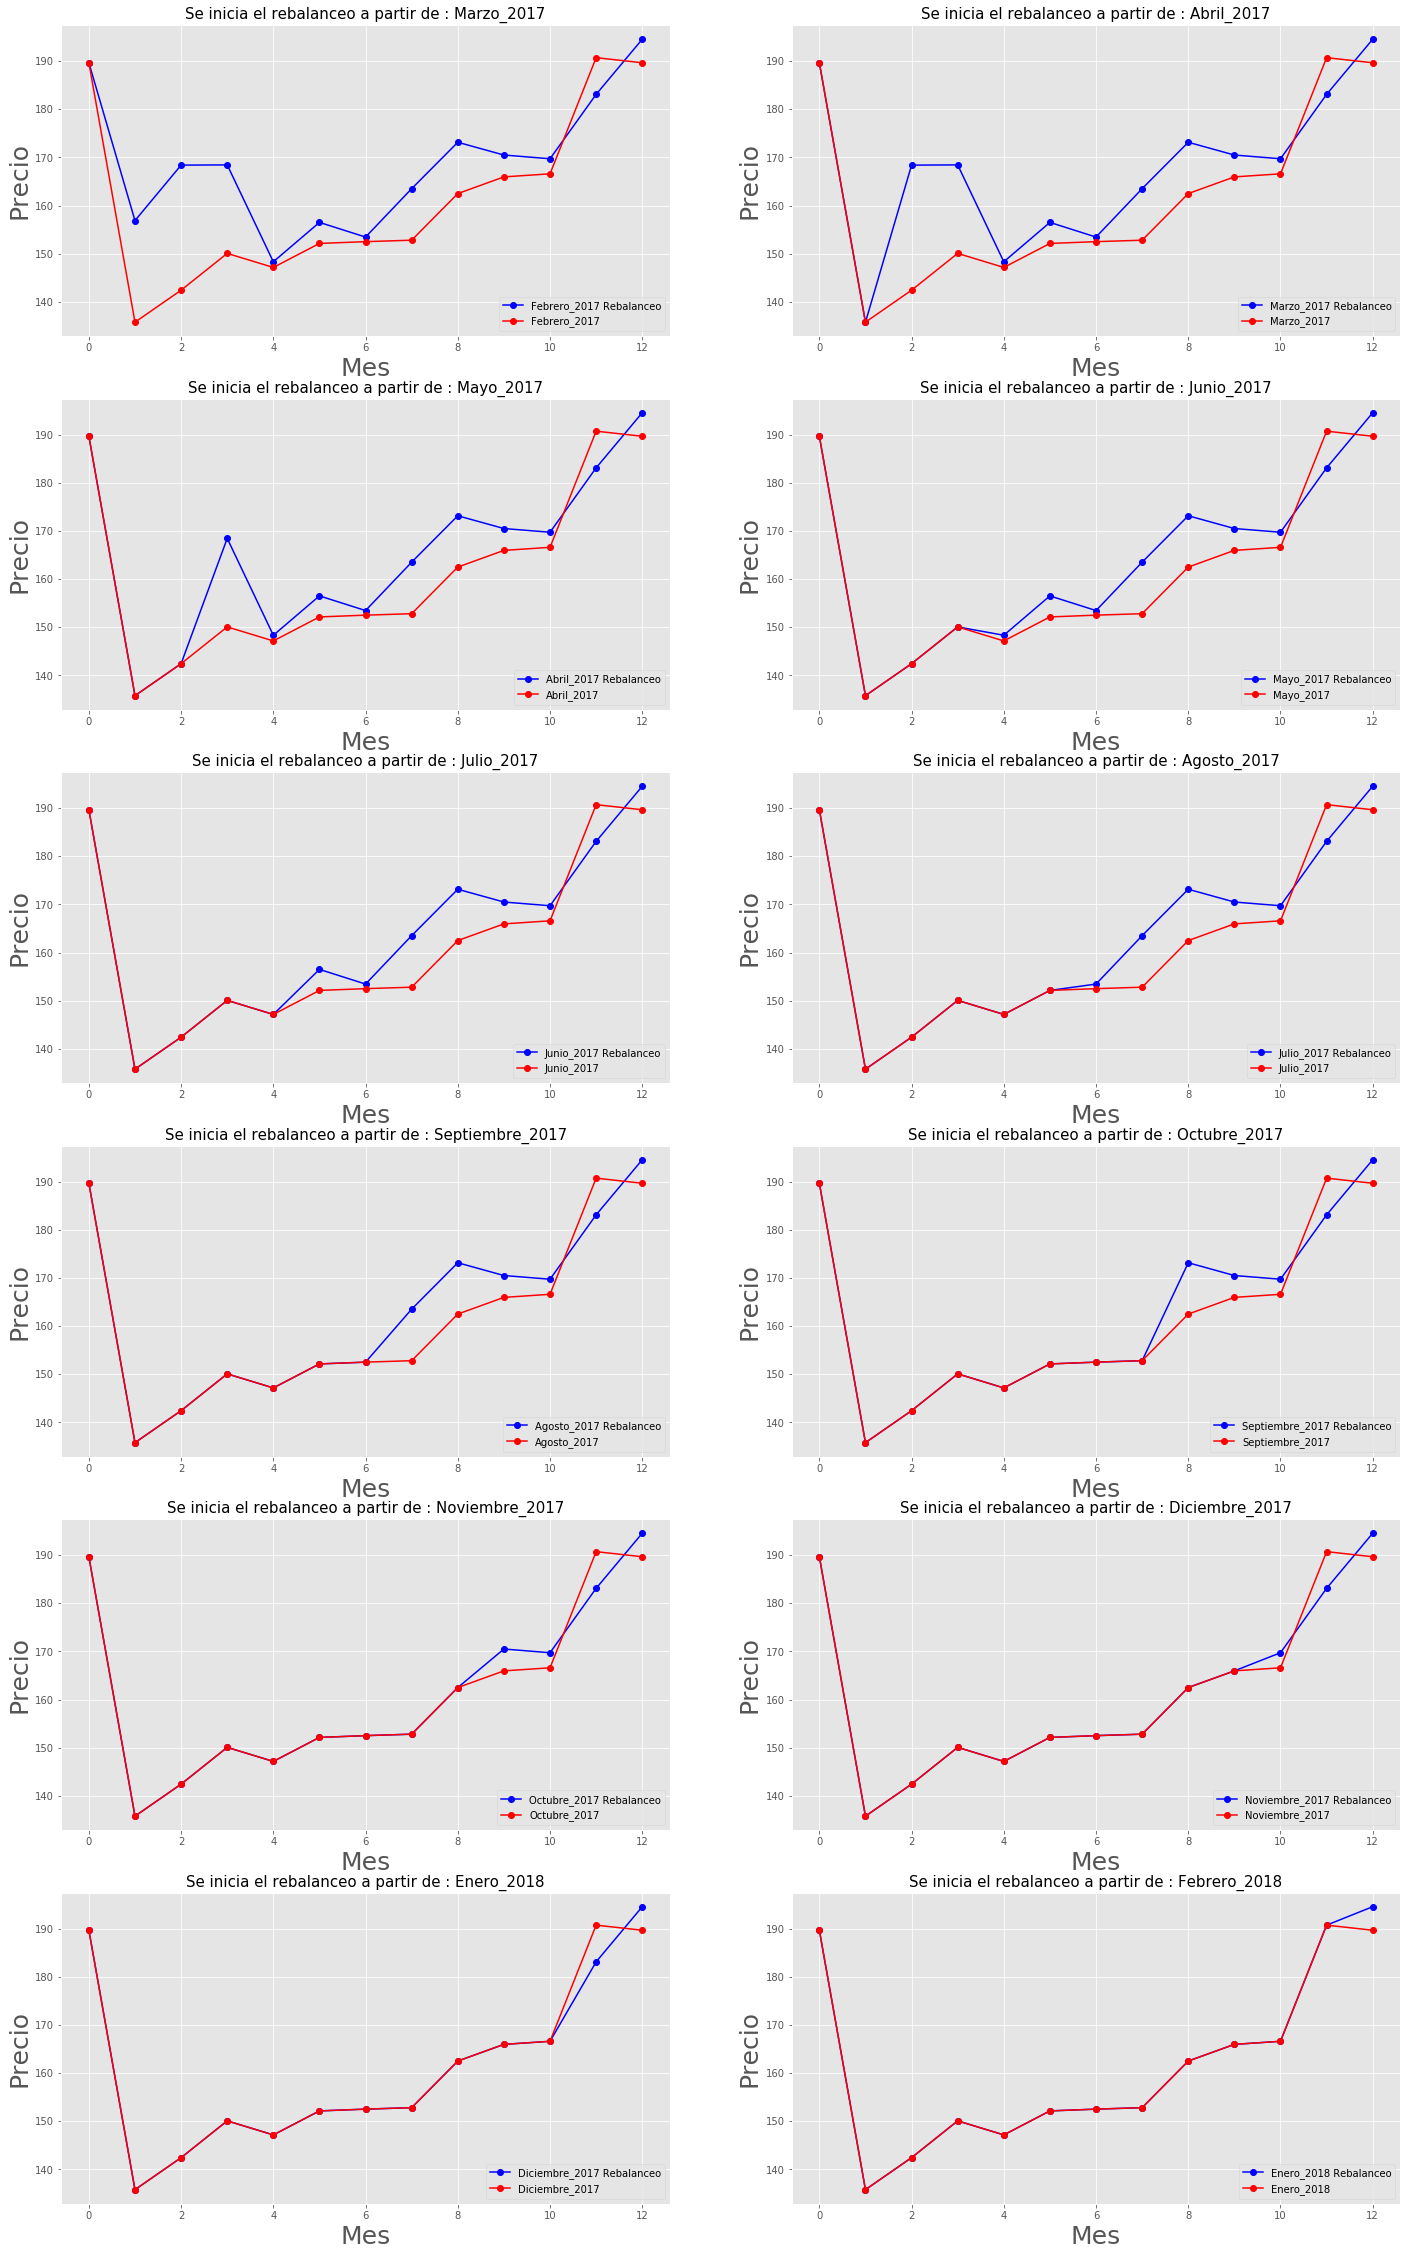

In [71]:
fig,axes = plt.subplots(6,2,figsize=(24,34))
contador=0
for k in range(0,6):
    for l in range(0,2):
        axes[k,l].set_title(primer_mes[1:][contador],size=15)
        axes[k,l].plot(np.arange(len(meses)),escenarios[contador],"bo-",label=Nombres_archivos[contador]+" Rebalanceo")
        axes[k,l].plot(np.arange(len(meses)),precios_mensuales,"ro-",label=Nombres_archivos[contador])
        axes[k,l].legend(loc="best")
        axes[k,l].set_xlabel("Mes",size=25)
        axes[k,l].set_ylabel("Precio",size=25)
        contador+=1
plt.subplots_adjust(top=.9,bottom=.01)
plt.show()

## <font color="blue"> Perfil  Conservador (Minimizar Volatilidad) </font>

In [72]:
# Conocer las 10 más altas volatilidades y las 10 más bajas (Esto se realiza con los precios calculados del NAV)
data = pd.read_csv("../Datos/"+nombres_navs[0],index_col="Date")
desviaciones_mes1 = pd.DataFrame(data.pct_change().std(),columns=["Std"])
# Se realizará a partir de quantiles
mas_altos = desviaciones_mes1[(desviaciones_mes1>=np.quantile(desviaciones_mes1,0.9)).values]
mas_bajos = desviaciones_mes1[(desviaciones_mes1<=np.quantile(desviaciones_mes1,0.1)).values]
# Crear función que itere por todos los documentos y obtenga cuales son los más altos y los más bajos y se concatene a los 
# ya realizados.
for k in range(1,12):
    data = pd.read_csv("../Datos/"+nombres_navs[k],index_col="Date")
    desviaciones_mes1 = pd.DataFrame(data.pct_change().std(),columns=["Mean"])
    # Se realizará a partir de quantiles
    altos = desviaciones_mes1[(desviaciones_mes1>=np.quantile(desviaciones_mes1,0.9)).values]
    bajos = desviaciones_mes1[(desviaciones_mes1<=np.quantile(desviaciones_mes1,0.1)).values]
    mas_altos = pd.concat([mas_altos,altos],axis=1,sort=True)
    mas_bajos = pd.concat([mas_bajos,bajos],axis=1,sort=True)
mas_altos.shape, mas_bajos.shape # Están todos los de cada mes  

((217, 12), (152, 12))

In [73]:
altoos = mas_altos.copy()
bajoos = mas_bajos.copy()
mas_altos = bajoos; mas_bajos = altoos

##### <center>Por fines prácticos se asignará las volatilidades más bajas como "mas_altas" y las más altas como "mas_bajas". Esto para reutilizar el código en el rebalanceo pasado.

In [74]:
# Empezar rebalaceo
## Calculo de los pesos
nuevos_pesos = pd.DataFrame()
rebalanceos = []
contador = 3
for k in range(tickers.shape[1]):
    if k==0:
        # Unir ticker con peso y trabajar uno a uno
        data_concatenada = pd.concat([tickers.iloc[:,k].dropna(),peso.iloc[:,k].dropna()],axis=1)
        data_concatenada.index = data_concatenada.iloc[:,0]
        data_concatenada = pd.DataFrame(data_concatenada.iloc[:,1])

        # Quitar el 25% a los más altos
        modificas_baja = data_concatenada.loc[mas_bajos.iloc[:,k].dropna().index.values.tolist(),:].dropna()*.75
        diferencia = np.sum(modificas_baja)/.75-np.sum(modificas_baja)
        # Ponderar y sumar a las altas
        ponderaciones =  (data_concatenada.loc[mas_altos.iloc[:,k].dropna().index.values.tolist(),:])/np.sum(data_concatenada.loc[mas_altos.iloc[:,k].dropna().index.values.tolist(),:])
        respectivo_porcentaje = pd.DataFrame(ponderaciones*diferencia)
        modificas_alta = data_concatenada.loc[mas_altos.iloc[:,k].dropna().index.values.tolist(),:].dropna()+respectivo_porcentaje.dropna()

        # Reasignar
        data_concatenada.loc[modificas_baja.index.values,:] = modificas_baja
        data_concatenada.loc[modificas_alta.index.values,:] = modificas_alta
    elif k>0: # Hago esto para unir todos los pesos en un dataset. 
        data_concatenadas = pd.concat([tickers.iloc[:,k].dropna(),peso.iloc[:,k].dropna()],axis=1)
        data_concatenadas.index = data_concatenadas.iloc[:,0]
        data_concatenadas = pd.DataFrame(data_concatenadas.iloc[:,1])

        # Quitar el 25% a los más bajos
        modificas_baja = data_concatenadas.loc[mas_bajos.iloc[:,k].dropna().index.values.tolist(),:].dropna()*.75
        diferencia = np.sum(modificas_baja)/.75-np.sum(modificas_baja)
        # Ponderar y sumar a las altas
        ponderaciones =  (data_concatenadas.loc[mas_altos.iloc[:,k].dropna().index.values.tolist(),:])/np.sum(data_concatenadas.loc[mas_altos.iloc[:,k].dropna().index.values.tolist(),:])
        respectivo_porcentaje = pd.DataFrame(ponderaciones*diferencia)
        modificas_alta = data_concatenadas.loc[mas_altos.iloc[:,k].dropna().index.values.tolist(),:].dropna()+respectivo_porcentaje.dropna()

        # Reasignar
        data_concatenadas.loc[modificas_baja.index.values,:] = modificas_baja
        data_concatenadas.loc[modificas_alta.index.values,:] = modificas_alta

        # Unir todos los pesos en un nuevo dataset
        data_concatenada = pd.concat([data_concatenada,data_concatenadas],axis=1)

In [75]:
# Obtener nuevos precios después del rebalanceo una vez ordenados los datos
contador=1; nuevos_precios = []
for k in range(0,12):
    data = peso_precio.iloc[:,[0,contador]]
    data.index = data.iloc[:,0]
    data = data.iloc[:,1]
    prec = np.sum(data.sort_index()*data_concatenada.iloc[:,k])
    nuevos_precios.append(prec)
    contador+=2

In [76]:
# Escenarios
escenarios = []
for k in range(12,0,-1):
    a =precios_mensuales[:-(k)].values
    b = nuevos_precios[-k:]
    c = np.concatenate([a,b])
    escenarios.append(c)
len(escenarios)

12

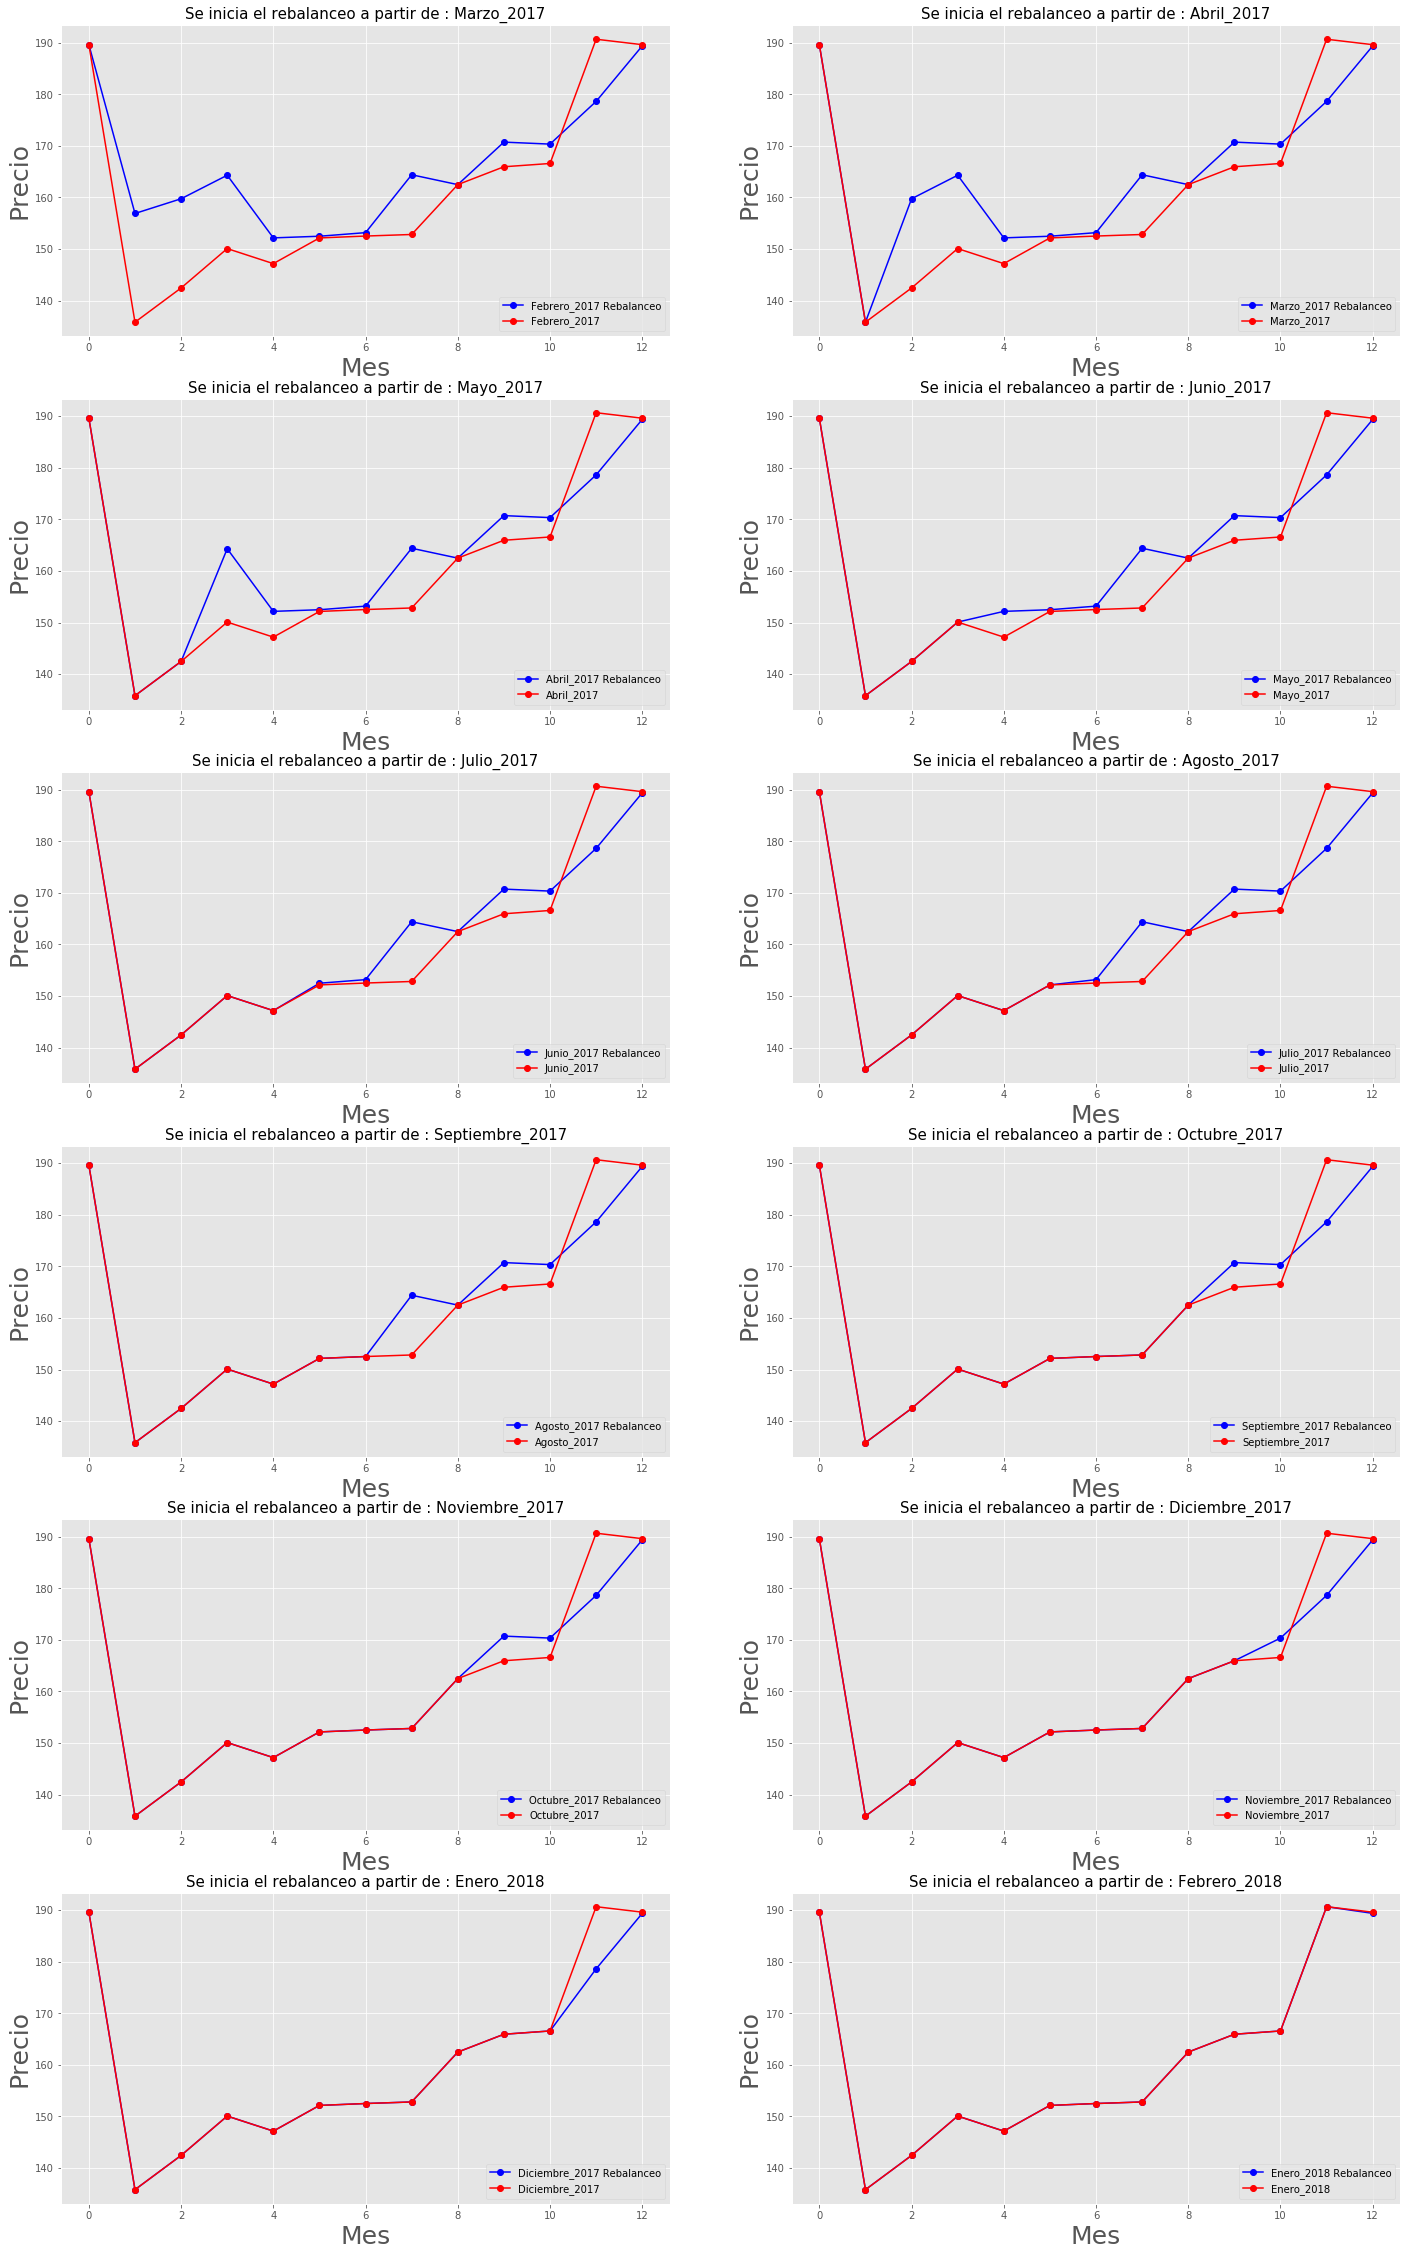

In [77]:
fig,axes = plt.subplots(6,2,figsize=(24,34))
contador=0
for k in range(0,6):
    for l in range(0,2):
        axes[k,l].set_title(primer_mes[1:][contador],size=15)
        axes[k,l].plot(np.arange(len(meses)),escenarios[contador],"bo-",label=Nombres_archivos[contador]+" Rebalanceo")
        axes[k,l].plot(np.arange(len(meses)),precios_mensuales,"ro-",label=Nombres_archivos[contador])
        axes[k,l].legend(loc="best")
        axes[k,l].set_xlabel("Mes",size=25)
        axes[k,l].set_ylabel("Precio",size=25)
        contador+=1
plt.subplots_adjust(top=.9,bottom=.01)
plt.show()

## <font color="blue"> Maximizar el Radio de Sharp  </font>

#### <center>Se descargaron los datos para todo un año con los activos que se encontraban en el primer ETF.

In [78]:
# Importamos funcion minimize del modulo optimize de scipy
from scipy.optimize import minimize

In [79]:
precios_diarios = pd.read_csv("../Datos/Precios_diarios.csv",index_col="Date")
precios_diarios.head()

,AAPL,MSFT,XOM,AMZN,JNJ,JPM,FB,GE,WFC,T,...,PDCO,UAA,SWN,FTR,UA,AN,FSLR,ENDP,URBN,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-28,131.823517,61.196365,73.312630,845.039978,114.323029,84.645416,135.539993,26.701683,53.439133,36.255020,...,41.058880,20.620001,7.51,36.807011,18.559999,45.900002,36.189999,13.65,26.030001,12.728239
2017-03-01,134.517914,62.114594,74.845207,853.080017,115.866539,87.428940,137.419998,27.042055,55.147194,36.471905,...,41.456371,20.600000,7.72,36.681385,18.580000,46.610001,35.020000,12.82,25.480000,12.921090
2017-03-02,133.719223,61.225063,75.097641,848.909973,115.651382,86.065193,136.759995,27.042055,54.205448,36.497929,...,41.257626,20.930000,7.59,35.299553,18.959999,46.439999,35.520000,12.29,26.930000,12.776451
2017-03-03,134.508286,61.454613,74.340355,849.880005,115.801071,86.681679,137.169998,26.979355,54.371643,36.445869,...,40.652359,20.590000,7.71,36.053284,18.639999,45.820000,34.610001,12.25,26.059999,12.776451
2017-03-06,134.084869,61.473736,74.673927,846.609985,115.726227,85.859703,137.419998,26.871866,54.113125,36.402500,...,39.586365,20.049999,7.94,34.671444,18.309999,45.330002,33.330002,11.40,25.680000,12.776451


In [80]:
rendimientos_diarios = precios_diarios.pct_change().dropna()
rendimientos_diarios.head()

,AAPL,MSFT,XOM,AMZN,JNJ,JPM,FB,GE,WFC,T,...,PDCO,UAA,SWN,FTR,UA,AN,FSLR,ENDP,URBN,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-01,0.020439,0.015005,0.020905,0.009514,0.013501,0.032885,0.013870,0.012747,0.031963,0.005982,...,0.009681,-0.000970,0.027963,-0.003413,0.001078,0.015468,-0.032329,-0.060806,-0.021130,0.015151
2017-03-02,-0.005937,-0.014321,0.003373,-0.004888,-0.001857,-0.015598,-0.004803,0.000000,-0.017077,0.000714,...,-0.004794,0.016019,-0.016839,-0.037671,0.020452,-0.003647,0.014278,-0.041342,0.056907,-0.011194
2017-03-03,0.005901,0.003749,-0.010084,0.001143,0.001294,0.007163,0.002998,-0.002319,0.003066,-0.001426,...,-0.014670,-0.016245,0.015810,0.021352,-0.016878,-0.013351,-0.025619,-0.003255,-0.032306,0.000000
2017-03-06,-0.003148,0.000311,0.004487,-0.003848,-0.000646,-0.009483,0.001823,-0.003984,-0.004755,-0.001190,...,-0.026222,-0.026226,0.029831,-0.038328,-0.017704,-0.010694,-0.036983,-0.069388,-0.014582,0.000000
2017-03-07,0.001292,0.002023,-0.003743,-0.000697,0.000970,-0.005548,-0.000873,-0.004667,-0.005289,-0.001906,...,0.007531,-0.017955,-0.041562,-0.050725,-0.010923,-0.001544,-0.021002,-0.043860,-0.010514,-0.018868


In [81]:
std = pd.DataFrame(rendimientos_diarios.std(),columns=["Std"]).T # Desviación estandar de cada activo diario

In [82]:
mean = pd.DataFrame(rendimientos_diarios.mean(),columns=["Mean"]).T # Rendimiento de cada activo diario

In [83]:
info = pd.concat([std,mean])
info

,AAPL,MSFT,XOM,AMZN,JNJ,JPM,FB,GE,WFC,T,...,PDCO,UAA,SWN,FTR,UA,AN,FSLR,ENDP,URBN,NWS
Std,0.012302,0.011402,0.008973,0.014536,0.009366,0.011101,0.012879,0.015077,0.012704,0.011929,...,0.022228,0.031017,0.030524,0.051326,0.030511,0.019593,0.028963,0.039430,0.026795,0.012616
Mean,0.001106,0.001620,-0.000117,0.002356,0.000305,0.001060,0.001115,-0.002669,0.000150,-0.000319,...,-0.002109,-0.000474,-0.002320,-0.005068,-0.000529,0.000459,0.002541,-0.002134,0.001541,0.000925


In [84]:
matriz_correlacion = rendimientos_diarios.corr()

In [85]:
matriz_correlacion.head()

,AAPL,MSFT,XOM,AMZN,JNJ,JPM,FB,GE,WFC,T,...,PDCO,UAA,SWN,FTR,UA,AN,FSLR,ENDP,URBN,NWS
AAPL,1.000000,0.604703,0.279037,0.508446,0.210615,0.352223,0.534394,0.124645,0.240713,0.166361,...,0.121891,0.107915,0.198773,0.153648,0.109067,0.074834,0.263445,0.160407,0.043165,0.349906
MSFT,0.604703,1.000000,0.280354,0.648166,0.386052,0.387163,0.603278,0.163006,0.334492,0.177506,...,0.077560,0.177290,0.136407,0.116996,0.174176,0.189085,0.383759,0.094814,0.169507,0.280621
XOM,0.279037,0.280354,1.000000,0.059400,0.360201,0.441636,0.260270,0.292058,0.454290,0.372439,...,0.158361,0.199799,0.392463,0.242427,0.187484,0.202325,0.107459,0.040694,0.213257,0.396205
AMZN,0.508446,0.648166,0.059400,1.000000,0.099752,0.163410,0.567649,0.041859,0.156265,0.023805,...,0.017860,0.064648,0.105257,0.106510,0.075579,0.011180,0.397929,0.052605,-0.001766,0.169095
JNJ,0.210615,0.386052,0.360201,0.099752,1.000000,0.316173,0.278771,0.155942,0.322133,0.284571,...,0.260769,0.076987,0.014245,0.107813,0.083273,0.165965,0.140632,0.081300,0.060517,0.256393


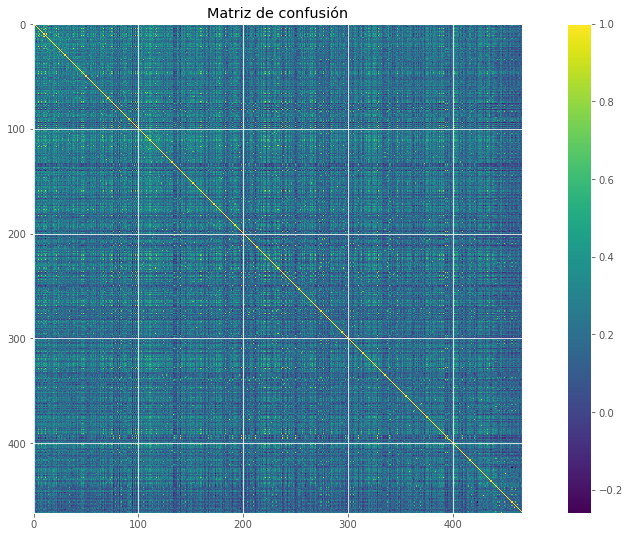

In [86]:
plt.figure(figsize=(16,9))
plt.title("Matriz de confusión") # Es la matriz de correlaciones, pero expresada de manera gráfica
plt.imshow(matriz_correlacion)
plt.colorbar()
plt.show()

In [87]:
# Tasa libre de riesgo
rf = 0.05
## Construcción de parámetros
# 1. Sigma: matriz de varianza-covarianza
D = np.diag(info.loc['Std'])
Sigma = D.dot(matriz_correlacion).dot(D)
# 2. Eind: rendimientos esperados activos individuales
Eind = np.array(info.loc['Mean'])

In [88]:
# Función objetivo
def m_sharpe_r(w, Sigma, rf, Eind):
    Erp = Eind.dot(w)
    varp= w.dot(Sigma).dot(w)
    return -(Erp-rf)/np.sqrt(varp)

In [89]:
# Dato inicial
w0 = np.ones((info.shape[1],))/info.shape[1]
# Cotas de las variables
bnds = ((0,1),)*info.shape[1]
# Restricciones
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)

In [90]:
# Portafolio EMV
EMV = minimize(m_sharpe_r, w0, args=(Sigma, rf, Eind),
              bounds = bnds, constraints = cons)
EMV

     fun: 1.832106905642232
     jac: array([-6.24465421e-01, -6.47866562e-01, -1.60196930e-01, -6.45916387e-01,
       -2.12474167e-01, -3.38219121e-01, -6.30207390e-01, -1.04143173e-01,
       -3.00109103e-01, -1.41167343e-01, -6.12025484e-01, -4.18775782e-01,
       -6.27263337e-01, -9.26875770e-02, -1.88531235e-01, -2.34243959e-01,
       -1.12072557e-01, -4.19724137e-02, -2.42135987e-01, -3.06510374e-01,
       -4.97905433e-01, -7.64804587e-01, -3.54016498e-01, -1.74074650e-01,
       -5.17641887e-01, -1.26352593e-01, -1.37555867e-01, -1.25564784e-01,
       -3.57206196e-01, -2.02660665e-01, -1.71005175e-01, -3.23269188e-01,
       -3.86581451e-01, -3.45479429e-01, -1.23055190e-01, -2.42347777e-01,
       -2.47021064e-01, -3.05530220e-01, -5.62174037e-01, -4.88882542e-01,
       -5.22233024e-01, -3.03505346e-01, -3.19484308e-01, -1.90261066e-01,
       -3.38481829e-01, -1.67508185e-01, -3.57094869e-01, -4.09907252e-01,
       -2.19110146e-01, -2.94618726e-01, -1.53859466e-01, -8.8

In [91]:
### Conocer pesos, rendimiento y volatilidad
pesos = EMV.x
Er_EMV = Eind.dot(pesos)
s_EMV = np.sqrt(pesos.dot(Sigma).dot(pesos))
Er_EMV,s_EMV

(0.0027789465035012837, 0.025774180180793384)

In [92]:
np.sum(pesos)

1.0000000006242733

In [93]:
max_radio_sharp_precios = []
for k in range(precios_diarios.shape[0]):
    max_radio_sharp_precios.append(np.sum(pesos*precios_diarios.iloc[k,:].values))

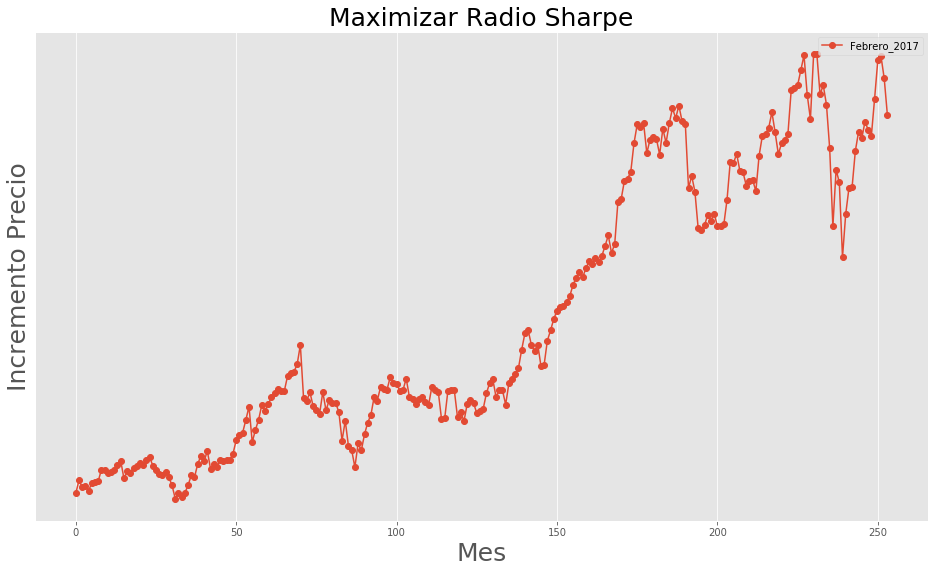

In [94]:
fig,ax = plt.subplots(1,1,figsize=(16,9))
ax.set_title("Maximizar Radio Sharpe",size=25)
ax.plot(max_radio_sharp_precios,"o-",label=Nombres_archivos[0])
ax.legend(loc="best")
ax.set_ylabel("Incremento Precio",size=25)
ax.set_xlabel("Mes",size=25)
ax.set_yticks([])
plt.show()

# <center><font color="green"> Modelos Predictivos 
    
<center>Utilizaremos 2 herramientas distintas (regresión y clasificación) de apoyo para predecir una vez dados los pesos del portafolio cual será el precio promedio del ETF durate el siguiente mes (mediante una regresión lineal multiple) y saber si se mantendrá positivo o negativo (Mediante una Maquina Soporte Vector(SVM).

In [95]:
from sklearn.svm import SVC # Para crear las Maquinas Soporte Vector para clasificar
from sklearn.linear_model import LinearRegression # Para crear la regresión lineal multiple

### Maquina Vector Soporte

In [96]:
ponderaciones = act_peso.iloc[:,1::2].dropna()
ponderaciones = ponderaciones.iloc[:,1:-1].T
ponderaciones

,0,1,2,3,4,5,6,7,8,9,...,497,498,499,500,501,502,503,504,505,506
Weight (%),3.71,2.50,1.73,1.67,1.66,1.65,1.56,1.54,1.28,1.26,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01
Weight (%),3.67,2.58,1.78,1.72,1.65,1.63,1.53,1.51,1.34,1.30,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01
Peso (%),3.86,2.60,1.90,1.72,1.68,1.61,1.51,1.41,1.41,1.37,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01
Peso (%),3.61,2.56,1.85,1.71,1.71,1.64,1.56,1.55,1.33,1.30,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01
Peso (%),3.66,2.65,1.89,1.85,1.69,1.60,1.57,1.54,1.33,1.31,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01
Weight (%),4.03,2.72,1.91,1.83,1.68,1.62,1.52,1.52,1.34,1.32,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01
Weight (%),3.68,2.65,1.87,1.77,1.63,1.61,1.61,1.55,1.34,1.34,...,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01
Weight (%),3.94,2.89,1.99,1.93,1.69,1.63,1.60,1.60,1.39,1.39,...,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01
Weight (%),3.90,2.85,2.06,1.84,1.64,1.63,1.62,1.55,1.36,1.35,...,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01
Weight (%),3.80,2.89,2.05,1.84,1.67,1.64,1.62,1.55,1.38,1.37,...,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01


In [97]:
X = ponderaciones.values/100
X.shape

(11, 507)

In [98]:
Y  = np.sign(precios_nav.iloc[:,:].mean().pct_change().dropna().values) # Si el cambio de un mes con respecto al otro fue positivo
# se pone 1, si fue negativo se pone 0.
Y.shape

(11,)

In [99]:
modelo = SVC(C=1e5,kernel="rbf")
modelo.fit(X,Y)

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [100]:
modelo.score(X,Y)

0.6363636363636364

In [101]:
# modelo.predict() Si se meten las nuevas ponderaciones te dirá si será positivo el precio promedio del ETF el siguiente mes

### Regresión Lineal Múltiple

In [102]:
Y = precios_nav.iloc[:,:-1].mean().values.reshape(-1,1) # Si no se hace reshape no te deja hacer la regresión
Y

array([[235.18533826],
       [231.82488947],
       [236.00703131],
       [249.43173438],
       [239.93195899],
       [243.80045887],
       [243.54017576],
       [257.2057265 ],
       [261.58783746],
       [283.17470386],
       [289.89238027]])

In [103]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
lm.intercept_

array([-67.87325171])

In [105]:
lm.coef_

array([[-1.02577742e+03,  5.70502645e+03,  2.39222045e+03,
        -3.19727143e+03,  2.93356577e+03,  2.86279277e+03,
         2.77781965e+03,  1.05205347e+03, -9.04797789e+02,
        -3.63126173e+02,  2.77540389e+03,  4.32868760e+03,
        -1.37382788e+03,  1.93903114e+03,  2.90150524e+03,
        -9.34504165e+02, -2.54284597e+02, -1.18025277e+03,
         8.68379856e+02,  2.25394678e+03,  4.22247678e+03,
        -8.86744684e+02,  1.75526731e+03,  3.71872366e+03,
        -1.54864441e+03, -1.32835936e+02, -3.54007053e+03,
        -4.06566502e+03, -9.69299064e+02, -2.43105919e+03,
        -4.69807352e+01,  4.21249662e+02,  4.99402781e+01,
        -4.42507891e+02,  1.11430512e+03,  5.61343618e+02,
         1.74989982e+03,  3.58167322e+02,  3.81038433e+03,
         3.47532147e+03,  3.35834430e+02, -3.50546470e+03,
         9.79168556e+02, -1.49846773e+03, -3.46837831e+03,
         2.55593035e+02,  1.82196276e+03, -9.63591901e+01,
        -5.05093587e+02, -2.46419869e+03, -1.20093067e+0

In [106]:
significantes = pd.concat([tickers.iloc[:,0],pd.DataFrame(lm.coef_).T],axis=1)
significantes.index = significantes.iloc[:,0]
significantes = significantes.iloc[:,1]
len(significantes[significantes>0].index),significantes[significantes>0].index

(230,
 Index(['MSFT', 'AMZN', 'JNJ', 'FB', 'BRKB', 'JPM', 'GOOGL', 'WFC', 'BAC', 'PG',
        ...
        'MNK', 'RL', 'DISCA', 'CSRA', 'NAVI', 'TDC', 'SWN', 'R', 'AN', 'UBFUT'],
       dtype='object', name='Marzo_2017', length=230))

$$\text{En este ETF (S&P500), de los 508 activos que los conteplan, según la relación lineal multiple realizada solo 230}$$
$$\text{son realmente significativos para que dicho portafolio tenga un buen comportamiento durante el mes(a la alza).}$$